# viewing the encode atac, gm12878

In [2]:
#let's see the data, visualize the bigwigs

import pyBigWig
import matplotlib.pyplot as plt
import numpy as np

ATAC_bw = pyBigWig.open("/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF667MDI.bigWig")
DNase_bw = pyBigWig.open("/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF093VXI.bigWig")

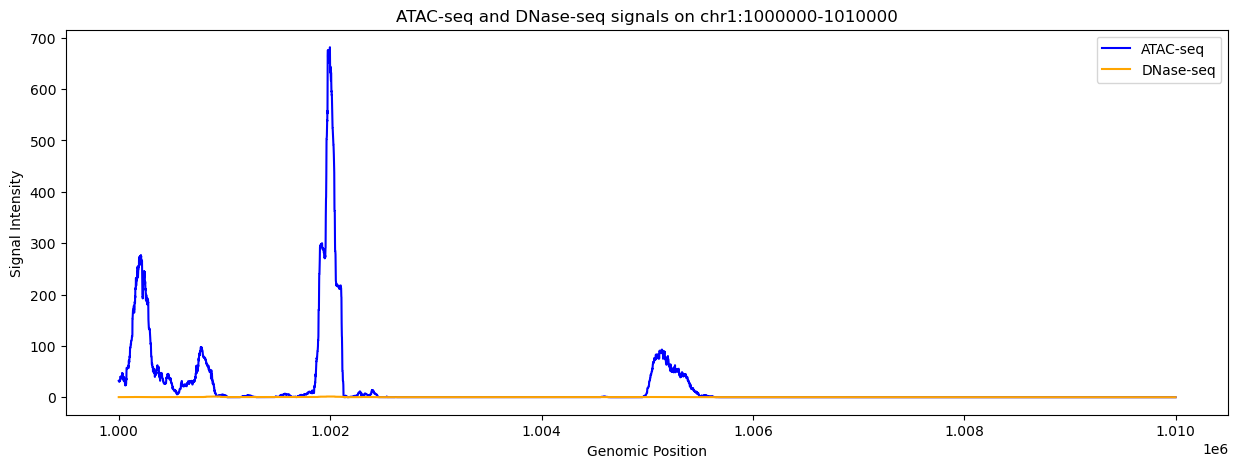

In [5]:
#now let's visualize a random region
chrom = "chr1"
start = 1000000
end = 1010000
ATAC_values = ATAC_bw.values(chrom, start, end)
ATAC_values = np.nan_to_num(ATAC_values)  # Replace NaNs with zeros
DNase_values = DNase_bw.values(chrom, start, end)
DNase_values = np.nan_to_num(DNase_values)  # Replace NaNs with

#now let's plot
plt.figure(figsize=(15, 5))
plt.plot(range(start, end), ATAC_values, label='ATAC-seq', color='blue')
plt.plot(range(start, end), DNase_values, label='DNase-seq', color='orange')
plt.title(f'ATAC-seq and DNase-seq signals on {chrom}:{start}-{end}')
plt.xlabel('Genomic Position')
plt.ylabel('Signal Intensity')
plt.legend()

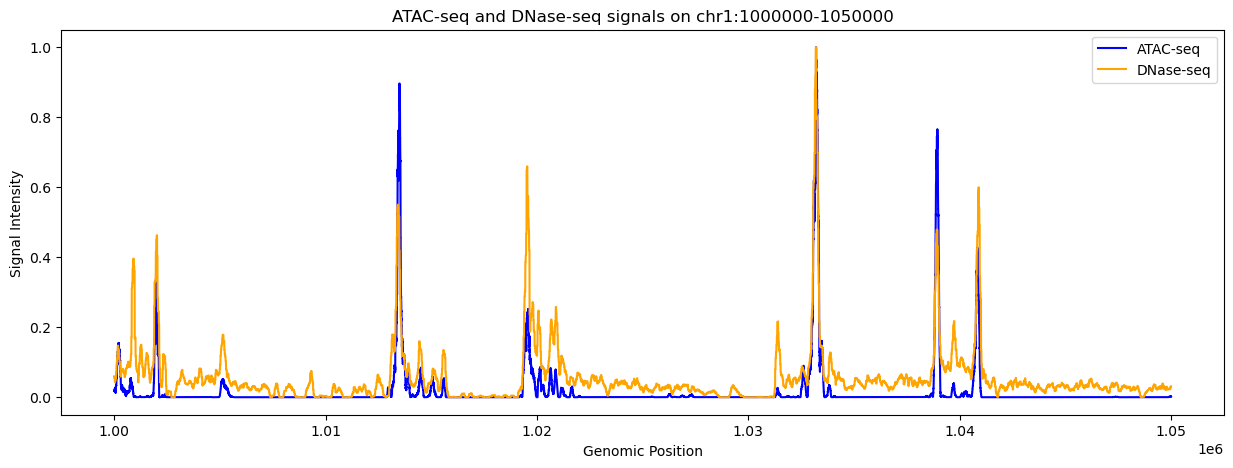

In [9]:
#ok relative values are too different, let's try scaling
chrom = "chr1"
start = 1_000_000
end = 1_050_000
ATAC_values = ATAC_bw.values(chrom, start, end)
ATAC_values = np.nan_to_num(ATAC_values)  # Replace NaNs with zeros
DNase_values = DNase_bw.values(chrom, start, end)
DNase_values = np.nan_to_num(DNase_values)  # Replace NaNs with
ATAC_values = ATAC_values / np.max(ATAC_values)
DNase_values = DNase_values / np.max(DNase_values)


#now let's plot
plt.figure(figsize=(15, 5))
plt.plot(range(start, end), ATAC_values, label='ATAC-seq', color='blue')
plt.plot(range(start, end), DNase_values, label='DNase-seq', color='orange')
plt.title(f'ATAC-seq and DNase-seq signals on {chrom}:{start}-{end}')
plt.xlabel('Genomic Position')
plt.ylabel('Signal Intensity')
plt.legend()

#quite similar, but you see that ATAC finds less peaks actually? At least in this region

In [2]:
#but you can see at least when it's scaled that it's similar, but more binary, 0 outside of peaks, 1 inside of peaks, because used macs2 to call peaks

#but let's just try training a model on this for a first run? obvuiously shouldnl't hto.

#let's load in a large region and see the max for both
chrom = "chr1"
start = 0
end = 10_000_000

ATAC_values = ATAC_bw.values(chrom, start, end)
ATAC_values = np.nan_to_num(ATAC_values)  # Replace NaNs with
DNase_values = DNase_bw.values(chrom, start, end)
DNase_values = np.nan_to_num(DNase_values)  # Replace NaNs with
print(f"ATAC max: {np.max(ATAC_values)}, DNase max: {np.max(DNase_values)}")
#and mean
print(f"ATAC mean: {np.mean(ATAC_values)}, DNase mean: {np.mean(DNase_values)}")

ATAC max: 14051.119140625, DNase max: 9.448030471801758
ATAC mean: 9.947267723239733, DNase mean: 0.09295656349499616


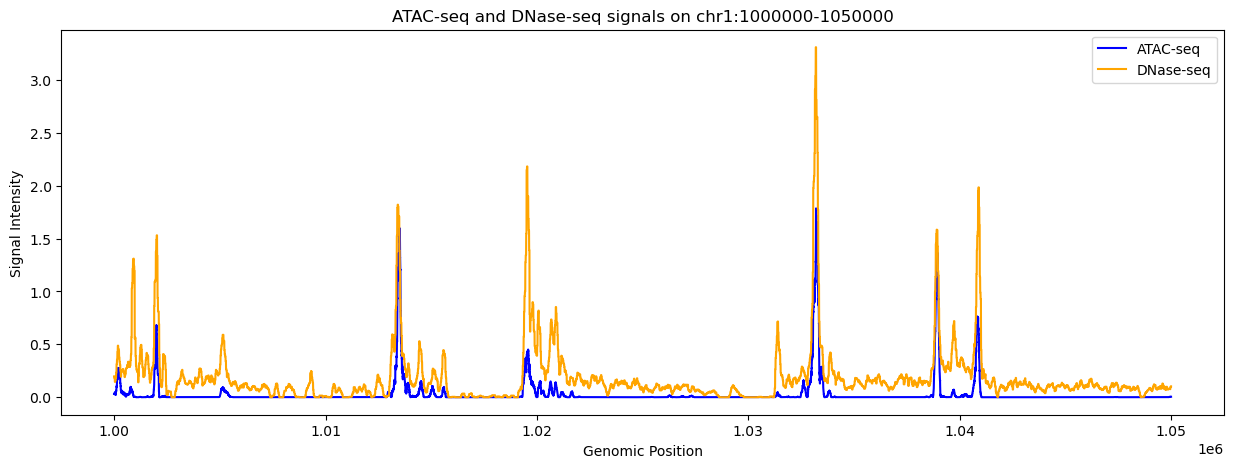

In [3]:
#so if we divide by 1000, should be similar scales?

chrom = "chr1"
start = 1_000_000
end = 1_050_000
ATAC_values = ATAC_bw.values(chrom, start, end)
ATAC_values = np.nan_to_num(ATAC_values)  # Replace NaNs with zeros
DNase_values = DNase_bw.values(chrom, start, end)
DNase_values = np.nan_to_num(DNase_values)  # Replace NaNs with
ATAC_values = ATAC_values / 1000
# DNase_values = DNase_values / np.max(DNase_values)


#now let's plot
plt.figure(figsize=(15, 5))
plt.plot(range(start, end), ATAC_values, label='ATAC-seq', color='blue')
plt.plot(range(start, end), DNase_values, label='DNase-seq', color='orange')
plt.title(f'ATAC-seq and DNase-seq signals on {chrom}:{start}-{end}')
plt.xlabel('Genomic Position')
plt.ylabel('Signal Intensity')
plt.legend()

In [ ]:
#so we'll use these parameters
#scale 0.001, clip and clip soft use borzoi defaults

In [3]:
#and we'll take a look at the bw2npy script and modify it
#and now look at what the outputs are

dnase_npz = np.load("/data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/cell_type_arrays/GM12878_DNase.npz")
atac_npz = np.load("/data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/cell_type_arrays/GM12878_ATAC_pvalue.npz")

In [4]:
#now let's load them in and look at some values
dnase = dnase_npz['chr1']
atac = atac_npz['chr1']

In [7]:
dnase.shape

(1, 248956422)

In [8]:
atac.shape

(1, 248956422)

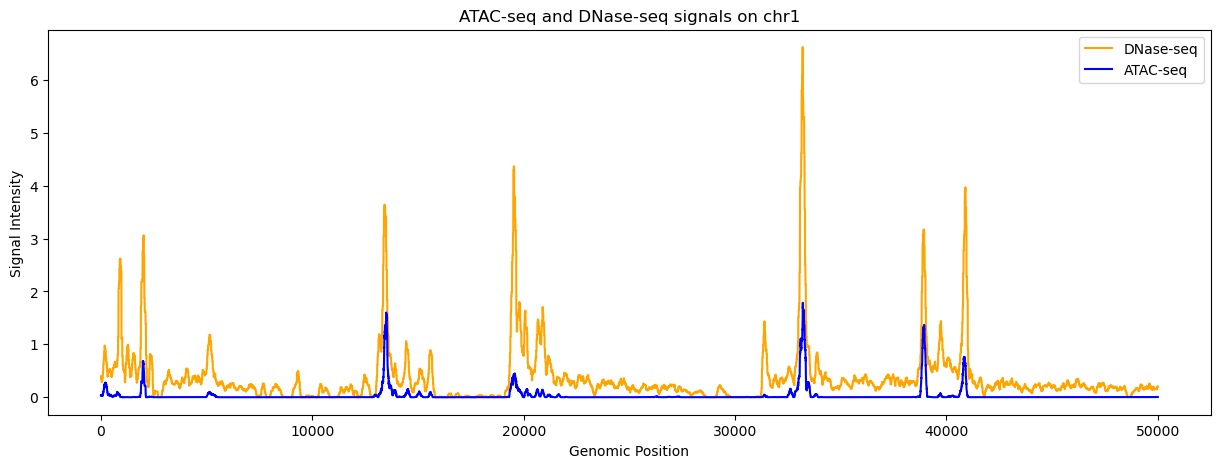

In [ ]:
#and now look at them
start = 1_000_000
end = 1_050_000
plt.figure(figsize=(15, 5))
plt.plot(range(len(dnase[0,start:end])), dnase[0,start:end], label='DNase-seq', color='orange')
plt.plot(range(len(atac[0,start:end])), atac[0,start:end], label='ATAC-seq', color='blue')
plt.title('ATAC-seq and DNase-seq signals on chr1')
plt.xlabel('Genomic Position')
plt.ylabel('Signal Intensity')
plt.legend()

#generally smaller in value, but quite comparable?

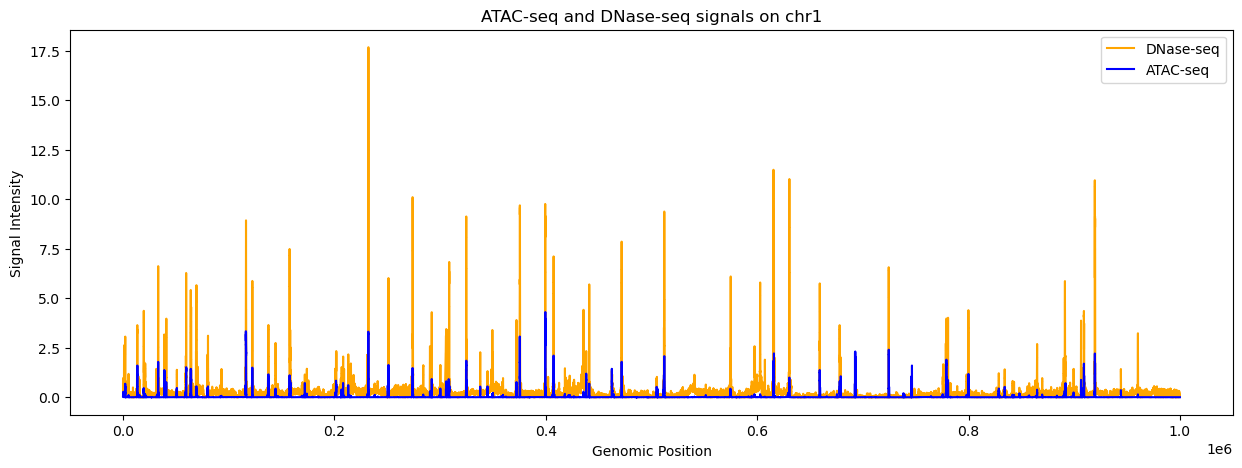

In [10]:
start = 1_000_000
end = 2_000_000
plt.figure(figsize=(15, 5))
plt.plot(range(len(dnase[0,start:end])), dnase[0,start:end], label='DNase-seq', color='orange')
plt.plot(range(len(atac[0,start:end])), atac[0,start:end], label='ATAC-seq', color='blue')
plt.title('ATAC-seq and DNase-seq signals on chr1')
plt.xlabel('Genomic Position')
plt.ylabel('Signal Intensity')
plt.legend()

In [6]:
#wait are the values integers?
np.unique(dnase[0,100_000:1000100])

array([0.      , 0.007614, 0.01523 , 0.02284 , 0.03046 , 0.03806 ,
       0.0457  , 0.05328 , 0.0609  , 0.06854 , 0.0761  , 0.08374 ,
       0.0914  , 0.099   , 0.10657 , 0.1142  , 0.1218  , 0.1294  ,
       0.1371  , 0.1447  , 0.1522  , 0.1599  , 0.1675  , 0.175   ,
       0.1827  , 0.1903  , 0.198   , 0.2056  , 0.2131  , 0.2208  ,
       0.2284  , 0.236   , 0.2437  , 0.2512  , 0.2588  , 0.2664  ,
       0.2742  , 0.2817  , 0.2893  , 0.2969  , 0.3044  , 0.3123  ,
       0.3198  , 0.3274  , 0.335   , 0.3425  , 0.35    , 0.358   ,
       0.3655  , 0.373   , 0.3806  , 0.3882  , 0.396   , 0.4036  ,
       0.4111  , 0.4187  , 0.4263  , 0.4338  , 0.4417  , 0.4492  ,
       0.4568  , 0.4644  , 0.472   , 0.4797  , 0.4873  , 0.4949  ,
       0.5024  , 0.5103  , 0.5176  , 0.5254  , 0.5327  , 0.5405  ,
       0.5483  , 0.5557  , 0.5635  , 0.571   , 0.5786  , 0.5864  ,
       0.5938  , 0.6016  , 0.609   , 0.6167  , 0.6245  , 0.632   ,
       0.6396  , 0.647   , 0.655   , 0.662   , 0.67    , 0.677

In [ ]:
np.unique(atac[0,100_000:1000100])
#ok never mind, neither are integers...
#it's whatever I think

array([0.00000000e+00, 5.96046448e-08, 1.19209290e-07, ...,
       2.19335938e+00, 2.19531250e+00, 2.20507812e+00])

In [8]:
#let's see if enformer pooled does this

test = np.load('/data1/lesliec/sarthak/data/enformer/data/test_label.npy')
test.shape

(1937, 896, 5313)

In [ ]:
test[0,:,0]
#yeah definitely not integer lol. Oh well, this is fine

array([0.04208  , 0.053    , 0.05258  , 0.071    , 0.03873  , 0.03482  ,
       0.0224   , 0.004257 , 0.       , 0.02768  , 0.02797  , 0.03867  ,
       0.01208  , 0.01373  , 0.01526  , 0.01747  , 0.002342 , 0.001057 ,
       0.       , 0.000218 , 0.00972  , 0.01377  , 0.017    , 0.007607 ,
       0.002914 , 0.00793  , 0.01102  , 0.0432   , 0.02673  , 0.02074  ,
       0.02336  , 0.01469  , 0.01855  , 0.03827  , 0.03117  , 0.04672  ,
       0.03415  , 0.0324   , 0.0169   , 0.02718  , 0.0502   , 0.04227  ,
       0.0433   , 0.0421   , 0.02614  , 0.02037  , 0.01246  , 0.003849 ,
       0.04028  , 0.02356  , 0.01959  , 0.0302   , 0.0431   , 0.03093  ,
       0.05692  , 0.05884  , 0.0518   , 0.03464  , 0.0513   , 0.05435  ,
       0.0558   , 0.04172  , 0.04407  , 0.0856   , 0.0647   , 0.04437  ,
       0.05328  , 0.03528  , 0.04306  , 0.05038  , 0.08307  , 0.08936  ,
       0.05386  , 0.01387  , 0.02744  , 0.02324  , 0.06006  , 0.04703  ,
       0.03873  , 0.0563   , 0.06335  , 0.02489  , 